In [1]:
import numpy as np 
import pandas as pd
import joblib

import warnings 

warnings.filterwarnings('ignore')

In [2]:
path = '..\\Adv_sales Pred\\Advertising.csv'
dataset = pd.read_csv(path)
dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# **Simple Linear Regression**

## Getting Test set and Loading Simple Linear Model

In [3]:
from sklearn.model_selection import train_test_split 

X = dataset.iloc[:,0].values
y = dataset.iloc[:,3].values

X = X.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

model_SimpLR = joblib.load('Model Sales_simple_predict.sav') # Load model
y_pred = model_SimpLR.predict(X_test) # Predicting the Test set results

## Test set results

In [4]:
result = model_SimpLR.score(X_test, y_test)
print (f'An estimate of the accuracy of the model on unseen data is {result*100} %')

An estimate of the accuracy of the model on unseen data is 80.53611644334993 %


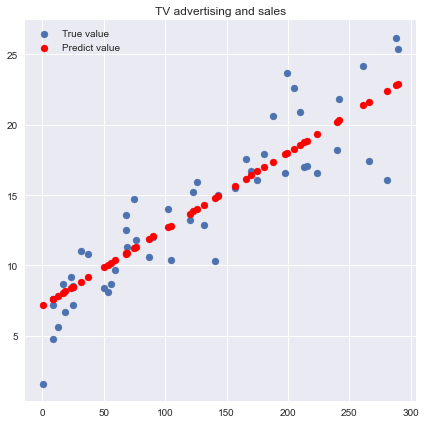

In [5]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')

plt.figure(figsize = (7,7))
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred,color = 'red')
plt.title('TV advertising and sales')
plt.legend(['True value','Predict value']);

## Predict values

In [6]:
## One value
X_values = X_test[22]
y_pred = model_SimpLR.predict([X_values])

print(f"Sales predict value: {float(y_pred)}")
print(f"Sales correct value: {y_test[22]}")

## List of value 
X_values = X_test[11:22]
y_pred = model_SimpLR.predict(X_values)

pd.DataFrame([y_pred,y_test[11:22]],index=['Sales predict value','Sales correct value'])


Sales predict value: 16.67688537769201
Sales correct value: 16.1


,0,1,2,3,4,5,6,7,8,9,10
Sales predict value,11.883797,15.668101,17.369402,11.294885,13.68325,21.611749,7.167048,11.202186,18.765342,22.811385,14.77928
Sales correct value,10.600000,15.500000,20.600000,11.800000,13.20000,17.400000,1.600000,14.700000,17.000000,26.200000,10.30000


# **Multiple Linear Regression**

## Getting Test set and Loading Multiple Linear Model

In [7]:
from sklearn.model_selection import train_test_split 

X = dataset.iloc[:,:3].values
y = dataset.iloc[:,3].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

model_MulLR = joblib.load('Model Sales_multiple_predict.sav') # Load model
y_pred = model_MulLR.predict(X_test) # Predicting the Test set results

## Test set results

In [8]:
result = model_MulLR.score(X_test, y_test)
print (f'An estimate of the accuracy of the model on unseen data is {result*100} %')

An estimate of the accuracy of the model on unseen data is 87.18069474344206 %


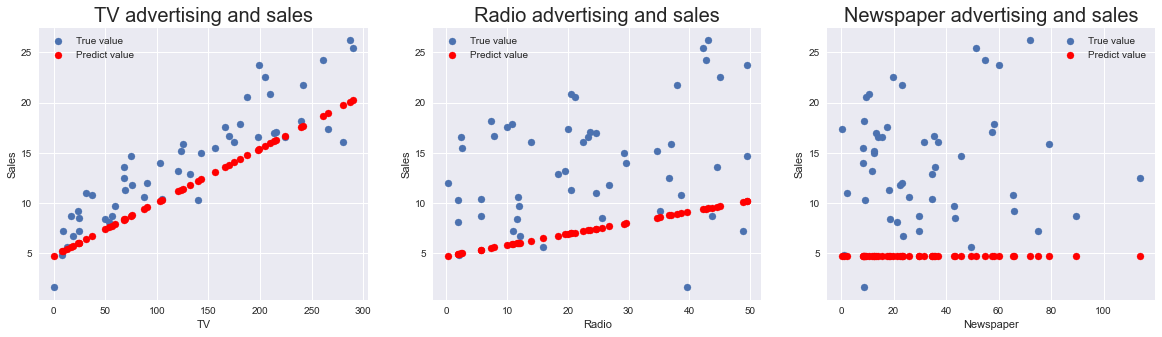

In [9]:
fig,((ax1,ax2,ax3)) = plt.subplots(figsize=(20,5),nrows=1,ncols=3)

ax1.scatter(X_test[:,0], y_test)
ax1.scatter(X_test[:,0], (model_MulLR.intercept_ + model_MulLR.coef_[0] * X_test[:,0]) ,color = 'red')
ax1.legend(['True value','Predict value'])
ax1.set_xlabel('TV')
ax1.set_ylabel('Sales')
ax1.set_title('TV advertising and sales',fontsize=20)

ax2.scatter(X_test[:,1], y_test)
ax2.scatter(X_test[:,1], (model_MulLR.intercept_ + model_MulLR.coef_[1] * X_test[:,1]) ,color = 'red')
ax2.legend(['True value','Predict value'])
ax2.set_xlabel('Radio')
ax2.set_ylabel('Sales')
ax2.set_title('Radio advertising and sales',fontsize=20)

ax3.scatter(X_test[:,2], y_test)
ax3.scatter(X_test[:,2], (model_MulLR.intercept_ + model_MulLR.coef_[2] * X_test[:,2]) ,color = 'red')
ax3.legend(['True value','Predict value'])
ax3.set_xlabel('Newspaper')
ax3.set_ylabel('Sales')
ax3.set_title('Newspaper advertising and sales',fontsize=20);

## Predict values

In [10]:
## One value
X_values = X_test[22]
y_pred = model_MulLR.predict([X_values])

print(f"Sales predict value: {float(y_pred)}")
print(f"Sales correct value: {y_test[22]}")

## List of value 
X_values = X_test[11:22]
y_pred = model_MulLR.predict(X_values)

pd.DataFrame([y_pred,y_test[11:22]],index=['Sales predict value','Sales correct value'])

Sales predict value: 16.571283533617184
Sales correct value: 16.1


,0,1,2,3,4,5,6,7,8,9,10
Sales predict value,10.691535,13.386106,17.096515,11.75962,13.317368,21.134107,9.138203,14.174206,18.851218,24.846554,12.437498
Sales correct value,10.600000,15.500000,20.600000,11.80000,13.200000,17.400000,1.600000,14.700000,17.000000,26.200000,10.300000
